In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_df = pd.read_csv('train_df2.csv', index_col=0)
train_df.drop(['positive', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
#train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
#               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
#              axis=1, inplace=True)
train_df.head()

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,1617361,849246716,5,5,5.000000,0.000000,0.200000,0.447214,0.000000,0.000000,...,0.186957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,53052607,849246716,3,5,3.600000,0.547723,0.400000,0.894427,0.400000,0.894427,...,-0.028547,0.172017,0.084518,0.194290,0.002472,0.006273,0.052950,0.344210,0.307019,0.363920
2,15679577,849246716,5,8,3.375000,1.505941,7.625000,19.175412,6.500000,17.188036,...,0.044000,0.371702,0.000015,0.316641,0.156807,0.052990,0.165214,0.011699,-0.066285,-0.171195
3,16367779,849246716,5,9,4.444444,0.527046,0.888889,1.364225,0.777778,1.092906,...,-0.171195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25485198,849246716,5,17,5.000000,0.000000,0.235294,0.437237,0.176471,0.392953,...,0.249734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
train_df.columns

Index(['customer_id', 'product_parent', 'star_rating', 'cust_review_count',
       'cust_star_rating_mean', 'cust_star_rating_std',
       'cust_total_votes_mean', 'cust_total_votes_std',
       'cust_helpful_votes_mean', 'cust_helpful_votes_std',
       'prod_review_count', 'prod_star_rating_mean', 'prod_star_rating_std',
       'prod_total_votes_mean', 'prod_total_votes_std',
       'prod_helpful_votes_mean', 'prod_helpful_votes_std', 'pos_sim',
       'neg_sim', 'pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3',
       'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
       'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
       'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
       'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3'],
      dtype='object')

In [4]:
train_df.groupby('star_rating').size()

star_rating
1     3431
2     2299
3     3801
4     7972
5    30219
dtype: int64

In [5]:
temp = train_df[train_df.star_rating == 1]
temp = pd.concat([temp, train_df[train_df.star_rating == 2]])
temp = pd.concat([temp, train_df[train_df.star_rating == 3]])
temp = pd.concat([temp, train_df[train_df.star_rating == 4][:4765]])
temp = pd.concat([temp, train_df[train_df.star_rating == 5][:4765]])
train_df = temp

In [6]:
train_df.groupby('star_rating').size() / len(train_df)

star_rating
1    0.180001
2    0.120613
3    0.199412
4    0.249987
5    0.249987
dtype: float64

In [7]:
len(train_df[train_df.star_rating > 3]) / len(train_df)

0.49997376842767954

In [8]:
test_df = pd.read_csv('test_df2.csv', index_col=0)
test_df.drop(['positive', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
#test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
#               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
#              axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,36330222,986428010,5,24,4.291667,1.267629,0.541667,1.250362,0.333333,1.049500,...,0.001941,0.000987,-0.015594,-0.013630,0.006534,0.007653,0.023873,-0.029103,-0.046843,-0.041810
1,24360083,986428010,4,23,4.347826,1.191206,1.434783,2.191431,1.000000,1.537412,...,0.901494,-0.222196,-0.196039,-0.217517,0.918800,0.925143,0.901494,0.919331,0.902017,1.000000
2,28891040,437083384,4,10,4.500000,0.707107,0.000000,0.000000,0.000000,0.000000,...,0.092532,0.313854,0.086877,0.315884,0.196752,0.052950,0.194290,0.054040,0.014332,-0.002904
3,52449052,437083384,3,5,3.400000,1.516575,11.800000,20.789420,10.400000,18.187908,...,0.187860,0.083284,-0.115922,0.023810,0.090283,-0.083403,0.025464,0.084633,-0.092710,0.019767
4,27192976,437083384,4,6,4.666667,0.816497,0.500000,1.224745,0.000000,0.000000,...,0.126235,-0.083963,0.036128,-0.155615,-0.020984,0.021015,-0.042505,0.059809,-0.017769,-0.064662


In [9]:
test_df.groupby('star_rating').size()

star_rating
1    1248
2     879
3    1446
4    3234
5    9028
dtype: int64

In [10]:
temp = test_df[test_df.star_rating == 1]
temp = pd.concat([temp, test_df[test_df.star_rating == 2]])
temp = pd.concat([temp, test_df[test_df.star_rating == 3]])
temp = pd.concat([temp, test_df[test_df.star_rating == 4][:1786]])
temp = pd.concat([temp, test_df[test_df.star_rating == 5][:1786]])
test_df = temp

In [11]:
len(test_df[test_df.star_rating > 3]) / len(test_df)

0.4999300209937019

In [12]:
train_ids = train_df[['customer_id', 'product_parent', 'star_rating', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']]

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_df_norm = pd.DataFrame(min_max_scaler.fit_transform(train_df), columns=train_df.columns, index=train_df.index)
train_df_norm[['customer_id', 'product_parent', 'star_rating', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']] = train_ids
train_df_norm.head()

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
41,13056300,927530974,1,0.009662,0.400000,0.948683,0.000958,0.000658,0.000829,0.000704,...,-0.101550,-0.006956,0.009816,0.008186,-0.198119,-0.183380,-0.169559,-0.048658,-0.054150,-0.059749
44,19967303,857219057,1,0.024155,0.562500,0.601338,0.007089,0.002731,0.005908,0.002400,...,-0.112887,-0.270663,-0.222196,-0.217517,-0.170426,-0.096344,-0.077012,0.173743,-0.155578,-0.148746
53,49283157,934621546,1,0.009662,0.750000,0.612372,0.000479,0.000271,0.000498,0.000282,...,0.240538,0.092777,0.107679,0.253574,0.015682,0.015621,-0.105031,0.037956,0.048229,0.034084
74,31007318,934621546,1,0.053140,0.660714,0.825212,0.001483,0.001165,0.001303,0.001009,...,0.221961,-0.161533,-0.154322,0.193814,0.000987,-0.013630,0.486891,0.005210,0.001941,0.182759
97,36493798,934621546,1,0.009662,0.950000,0.193649,0.001597,0.001195,0.001327,0.000960,...,0.127181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
test_ids = test_df[['customer_id', 'product_parent', 'star_rating', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']]

In [15]:
test_df_norm = pd.DataFrame(min_max_scaler.transform(test_df), columns=test_df.columns, index=test_df.index)
test_df_norm[['customer_id', 'product_parent', 'star_rating', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']] = test_ids
test_df_norm.head()

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
48,14252235,492347851,1,0.009662,1.000000,0.000000,0.000958,0.000499,0.000995,0.000517,...,-0.036035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
89,48189030,492347851,1,0.014493,0.541667,0.794512,0.006390,0.002775,0.005943,0.002545,...,-0.118247,0.285941,-0.132897,-0.118247,0.329414,0.000987,-0.013630,0.222047,-0.104434,-0.101832
90,9891231,492347851,1,0.009662,0.800000,0.362284,0.002716,0.000997,0.002322,0.000929,...,0.902017,0.018512,0.183956,0.202136,-0.063167,-0.222196,-0.217517,0.207801,0.040059,0.039550
97,31800633,492347851,1,0.009662,0.800000,0.564579,0.000639,0.000332,0.000498,0.000282,...,0.005750,0.087603,0.083421,0.094976,0.153926,-0.009339,-0.018355,0.134237,-0.159913,-0.173323
101,35290425,492347851,1,0.014493,0.750000,0.474342,0.000666,0.000355,0.000691,0.000368,...,-0.144800,-0.111532,1.000000,0.919331,-0.109643,0.918800,0.901494,-0.101550,0.916021,0.902017


In [16]:
train_x, train_y = train_df.drop('star_rating', axis=1), train_df['star_rating']
test_x, test_y = test_df.drop('star_rating', axis=1), test_df['star_rating']
train_x_norm = train_df_norm.drop('star_rating', axis=1)
test_x_norm = test_df.drop('star_rating', axis=1)

In [17]:
is_NaN = train_df_norm.isnull()
row_has_NaN = is_NaN.any(axis=1)
train_df_norm[row_has_NaN]

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3


In [18]:
def evaluate(m, x, test):
    correct = 0
    pos_count = 0
    star_cor = 0
    matrix = [0, 0, 0, 0]
    preds = m.predict(x)
    for i in range(len(test)):
        if (preds[i] > 3):
            pos_count += 1
        if (preds[i] == test.iloc[i]):
            star_cor += 1
        if (preds[i] > 3 and test.iloc[i] > 3):
            correct += 1
            matrix[0] += 1
        elif (preds[i] <= 3 and test.iloc[i] <= 3):
            correct += 1
            matrix[1] += 1
        elif (preds[i] > 3 and test.iloc[i] <= 3):
            matrix[2] += 1
        elif (preds[i] <= 3 and test.iloc[i] > 3):
            matrix[3] += 1

    print('Correct:', correct, correct / len(test_df))
    print('Pos:', pos_count, pos_count / len(test_df))
    print('Star Correct:', star_cor, star_cor / len(test_df))
    print('True Positive:', matrix[0], matrix[0] / len(test_df))
    print('True Negative:', matrix[1], matrix[1] / len(test_df))
    print('False Positive:', matrix[2], matrix[2] / len(test_df))
    print('False Negative:', matrix[3], matrix[3] / len(test_df))

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_x.drop(['customer_id', 'product_parent'], axis=1), train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [20]:
gb.score(test_x.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.3920223932820154

In [21]:
evaluate(gb, test_x.drop(['customer_id', 'product_parent'], axis=1), test_y)

Correct: 4967 0.6951714485654303
Pos: 3408 0.4769769069279216
Star Correct: 2801 0.3920223932820154
True Positive: 2401 0.33603918824352697
True Negative: 2566 0.35913226032190343
False Positive: 1007 0.14093771868439467
False Negative: 1171 0.16389083275017494


In [22]:
drop_cols = ['customer_id', 'product_parent']#, 'cust_review_count', 'prod_review_count']
             #'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
             #'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 
             #'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']

In [23]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)
rf.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [24]:
rf.score(test_x.drop(drop_cols, axis=1), test_y)

0.3815255423372988

In [25]:
evaluate(rf, test_x.drop(drop_cols, axis=1), test_y)

Correct: 4985 0.6976906927921623
Pos: 3432 0.48033589923023096
Star Correct: 2726 0.3815255423372988
True Positive: 2422 0.3389783065080476
True Negative: 2563 0.3587123862841148
False Positive: 1010 0.14135759272218335
False Negative: 1150 0.1609517144856543


<BarContainer object of 34 artists>

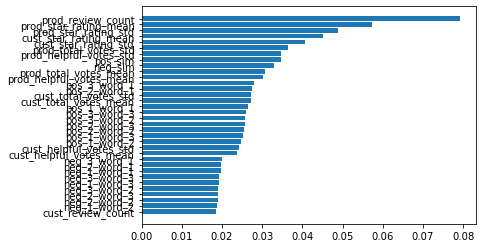

In [26]:
import matplotlib.pyplot as plt
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [27]:
rf2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf2.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
rf2.score(test_x.drop(drop_cols, axis=1), test_y)

0.1786313507103977

In [29]:
evaluate(rf2, test_x.drop(drop_cols, axis=1), test_y)

Correct: 5009 0.7010496850944716
Pos: 2930 0.4100769769069279
Star Correct: 3 0.0004198740377886634
True Positive: 2183 0.30552834149755076
True Negative: 2826 0.3955213435969209
False Positive: 747 0.10454863540937719
False Negative: 1389 0.19440167949615114


<BarContainer object of 34 artists>

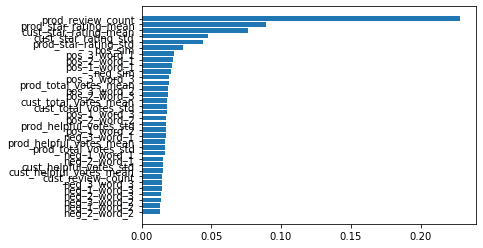

In [30]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf2.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(train_x.drop(drop_cols, axis=1), train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [32]:
knn.score(test_x.drop(drop_cols, axis=1), test_y)

0.24338698390482855

In [33]:
evaluate(knn, test_x.drop(drop_cols, axis=1), test_y)

Correct: 4158 0.5819454163750875
Pos: 2693 0.3769069279216235
Star Correct: 1739 0.24338698390482855
True Positive: 1639 0.22939118264520644
True Negative: 2519 0.35255423372988104
False Positive: 1054 0.1475157452764171
False Negative: 1933 0.27053883834849546


In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x.drop(drop_cols, axis=1), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
gnb.score(test_x.drop(drop_cols, axis=1), test_y)

0.2934919524142757

In [36]:
evaluate(gnb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 4649 0.650664800559832
Pos: 2212 0.30958712386284115
Star Correct: 2097 0.2934919524142757
True Positive: 1644 0.23009097270818754
True Negative: 3005 0.4205738278516445
False Positive: 568 0.07949615115465361
False Negative: 1928 0.26983904828551436


In [59]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import keras
import numpy as np

In [60]:
keras.backend.clear_session()

In [61]:
nn_train_x = train_x.drop(['customer_id', 'product_parent'], axis=1)
nn_test_x = test_x.drop(['customer_id', 'product_parent'], axis=1)

In [62]:
np.shape(nn_train_x)

(19061, 34)

In [63]:
train_y_cat = train_y - 1
test_y_cat = test_y - 1
train_y_cat = to_categorical(train_y_cat)
test_y_cat = to_categorical(test_y_cat)

In [64]:
network = models.Sequential()
'''network.add(layers.Dense(1024, activation='relu', input_shape=(34,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
network.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
network.add(layers.Dense(512, activation='relu', input_shape=(1024,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu', input_shape=(512,)))
network.add(layers.Dense(512, activation='relu', input_shape=(512,)))
network.add(layers.Dense(256, activation='relu', input_shape=(512,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(256, activation='relu', input_shape=(256,)))
network.add(layers.Dense(256, activation='relu', input_shape=(256,)))
network.add(layers.Dense(128, activation='relu', input_shape=(256,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(128, activation='relu', input_shape=(128,)))
network.add(layers.Dense(128, activation='relu', input_shape=(128,)))'''
network.add(layers.Dense(5, activation='softmax', input_shape=(34,)))
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 175       
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [65]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 30
history = network.fit(nn_train_x, 
                      train_y_cat, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(nn_test_x, test_y_cat))

Train on 19061 samples, validate on 7145 samples
Epoch 1/30
19061/19061 [==============================] - 11s 595us/step - loss: 56.1062 - accuracy: 0.2165 - val_loss: 9.6455 - val_accuracy: 0.2817
Epoch 2/30
19061/19061 [==============================] - 11s 587us/step - loss: 5.6845 - accuracy: 0.2968 - val_loss: 2.8994 - val_accuracy: 0.2582
Epoch 3/30
19061/19061 [==============================] - 12s 613us/step - loss: 1.9341 - accuracy: 0.3208 - val_loss: 2.0080 - val_accuracy: 0.2864
Epoch 4/30
19061/19061 [==============================] - 12s 650us/step - loss: 1.7374 - accuracy: 0.3369 - val_loss: 1.8553 - val_accuracy: 0.3103
Epoch 5/30
19061/19061 [==============================] - 11s 576us/step - loss: 1.6939 - accuracy: 0.3422 - val_loss: 1.7508 - val_accuracy: 0.3250
Epoch 6/30
19061/19061 [==============================] - 12s 639us/step - loss: 1.6590 - accuracy: 0.3486 - val_loss: 1.6946 - val_accuracy: 0.3325
Epoch 7/30
19061/19061 [==============================] 

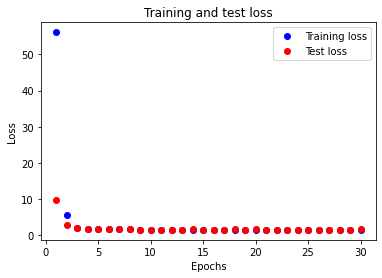

In [66]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

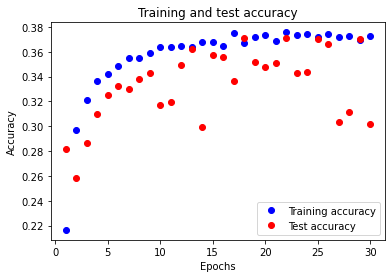

In [67]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = network.predict(nn_test_x)
for i in range(len(preds)):
    if (np.argmax(preds[i]) > 2):
        pos_count += 1
    if (np.argmax(preds[i]) == np.argmax(test_y_cat[i])):
        star_cor += 1
    if (np.argmax(preds[i]) > 2 and np.argmax(test_y_cat[i]) > 2):
        correct += 1
        matrix[0] += 1
    elif (np.argmax(preds[i]) <= 2 and np.argmax(test_y_cat[i]) <= 2):
        correct += 1
        matrix[1] += 1
    elif (np.argmax(preds[i]) > 2 and np.argmax(test_y_cat[i]) <= 2):
        matrix[2] += 1
    elif (np.argmax(preds[i]) <= 2 and np.argmax(test_y_cat[i]) > 2):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))

Correct: 4727 0.6615815255423373
Pos: 5070 0.7095871238628412
Star Correct: 2157 0.30188943317004896
True Positive: 3112 0.43554933519944017
True Negative: 1615 0.22603219034289712
False Positive: 1958 0.274037788663401
False Negative: 460 0.06438068579426172


In [69]:
#network.save('basic_neural_net4.h5')